Sally Wu

Course: CIS 9650 Programming for Analytics - Spring 2023

Final Project: Analyzing 2016-2017 Real Estate Transactions in NYC

## Part 1 - Data Cleaning & Manipulation

In [1]:
# Importing necessary packages for analysis
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
# This is information for Google Colab - ignore if viewing on Jupyter Notebooks
# Uploading the CSV containing data we will be analyzing - Kaggle: NYC Property Sales uploaded by City of New York
# from google.colab import files
# uploaded = files.upload()

In [3]:
# Reading the information from the csv
data = pd.read_csv("nyc-rolling-sales.csv")

In [4]:
# Providing preliminary information on the data set such as numbe of lines of data, number of columns of data, column names, and first 5 entries
print("Number of lines of data in the set:", len(data))
print("Number of columns in the set:", len(data.columns))
print(data.columns)
data.head(5)

Number of lines of data in the set: 84548
Number of columns in the set: 22
Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900.0,2,C2,6625000.0,7/19/2017 0:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900.0,2,C7,NaN,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900.0,2,C7,NaN,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913.0,2,C4,3936272.0,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900.0,2,C2,8000000.0,11/17/2016 0:00


In [5]:
# Creating dataframe with only columns needed for analysis
df = pd.DataFrame(data, columns = ["BOROUGH", "ADDRESS", "ZIP CODE", "NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "YEAR BUILT", "SALE PRICE", "SALE DATE"])

# Restructuring and renaming columns in table
df = df.rename(columns = {"BOROUGH":"Borough", "ADDRESS":"Address", "ZIP CODE":"Zip Code", "NEIGHBORHOOD":"Neighborhood", "BUILDING CLASS CATEGORY":"Building Code and Type", "RESIDENTIAL UNITS":"Residential Units", "COMMERCIAL UNITS":"Commercial Units", "TOTAL UNITS":"Total Units", 
"YEAR BUILT": "Year Built", "SALE PRICE":"Sale Price", "SALE DATE":"Sale Date"})

# Renaming Borough column so that 1 refers to Manhattan, 2 refers to Bronx, 3 refers to Brooklyn, 4 refers to Queens and 5 refers to Staten Island
df["Borough"] = df["Borough"].astype("object")
df["Borough"] = df["Borough"].replace({1:"Manhattan", 2:"Bronx", 3:"Brooklyn", 4:"Queens", 5:"Staten Island"})

# Deleting the extra "0:00" in the Sales Date Column so only the date shows and converting to datetime to use for later analysis
df["Sale Date"] = df["Sale Date"].str.replace(" 0:00", "")
df["Sale Date"] = pd.to_datetime(df["Sale Date"])

In [6]:
# Viewing all rows that have data in the sales price column and dropping any that have NaN
df.dropna()

,Borough,Address,Zip Code,Neighborhood,Building Code and Type,Residential Units,Commercial Units,Total Units,Year Built,Sale Price,Sale Date
0,Manhattan,153 AVENUE B,10009,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,5,0,5,1900.0,6625000.0,2017-07-19
3,Manhattan,154 EAST 7TH STREET,10009,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10,0,10,1913.0,3936272.0,2016-09-23
4,Manhattan,301 EAST 10TH STREET,10009,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,6,0,6,1900.0,8000000.0,2016-11-17
6,Manhattan,210 AVENUE B,10009,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,8,0,8,1920.0,3192840.0,2016-09-23
9,Manhattan,629 EAST 5TH STREET,10009,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,24,0,24,1920.0,16232000.0,2016-11-07
...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,37 QUAIL LANE,10309,WOODROW,02 TWO FAMILY DWELLINGS,2,0,2,1998.0,450000.0,2016-11-28
84544,Staten Island,32 PHEASANT LANE,10309,WOODROW,02 TWO FAMILY DWELLINGS,2,0,2,1998.0,550000.0,2017-04-21
84545,Staten Island,49 PITNEY AVENUE,10309,WOODROW,02 TWO FAMILY DWELLINGS,2,0,2,1925.0,460000.0,2017-07-05
84546,Staten Island,2730 ARTHUR KILL ROAD,10309,WOODROW,22 STORE BUILDINGS,0,7,7,2001.0,11693337.0,2016-12-21


In [7]:
# Displaying information regarding the table such as the total count, mean, standard deviation, minimum and maximum values
df.describe()

,Zip Code,Residential Units,Commercial Units,Total Units,Year Built,Sale Price
count,84548.000000,84548.000000,84548.000000,84548.000000,77577.000000,6.998700e+04
mean,10731.991614,2.025264,0.193559,2.249184,1950.095621,1.276456e+06
std,1290.879147,16.721037,8.713183,18.972584,34.198032,1.140526e+07
min,0.000000,0.000000,0.000000,0.000000,1680.000000,0.000000e+00
25%,10305.000000,0.000000,0.000000,1.000000,1925.000000,2.250000e+05
50%,11209.000000,1.000000,0.000000,1.000000,1945.000000,5.300000e+05
75%,11357.000000,2.000000,0.000000,2.000000,1970.000000,9.500000e+05
max,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,2.210000e+09


## Part 2 - Data Exploration

#### The first part of this data exploration is to understand the more popular locations for property sales and the most popular property type to be sold in NYC between 2016-2017.

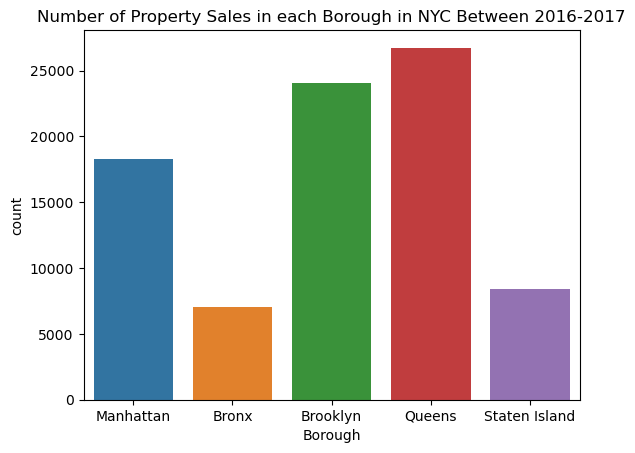

In [8]:
# Plotting the number of property sales in each borough
seaborn.countplot(x = "Borough", data = df)
plt.xlabel("Borough")
plt.title("Number of Property Sales in each Borough in NYC Between 2016-2017")
plt.show()

In [9]:
df["Borough"].describe()

count      84548
unique         5
top       Queens
freq       26736
Name: Borough, dtype: object

#### The borough with the most property sales in 2016-2017 was Queens followed by Brooklyn then Manhattan then Staten Island and finally Bronx.

This finding is supported by the article "The 50 Best-Selling NYC Neighborhoods from 2010 to 2020" written by the PropertyClub Team where they found that "Queens, Brooklyn each sold more homes than Manhattan from 2010 to 2020". It appears that Queens is the most active borough because homebuyers have been deterred by the rapidly rising costs of living in Manhattan; in fact, of the 50 neighborhoods featured in this article, 22 neighborhoods are located in Queens, which is close to half the list. The top 3 neighborhoods seeing the most sales from 2010-2020 are Flushing (Queens), Bedford Stuyvesant (Brooklyn) and Ozone Park (Queens). 

With this knowledge, looking only at the sales from 2016-2017, below shows a plot of the number of sales in just Brooklyn and Queens and it appears that the neighborhoods with the most property sales that year are Flushing Meadow Park, Flushing-South, Howard Beach, Astoria and Bayside.

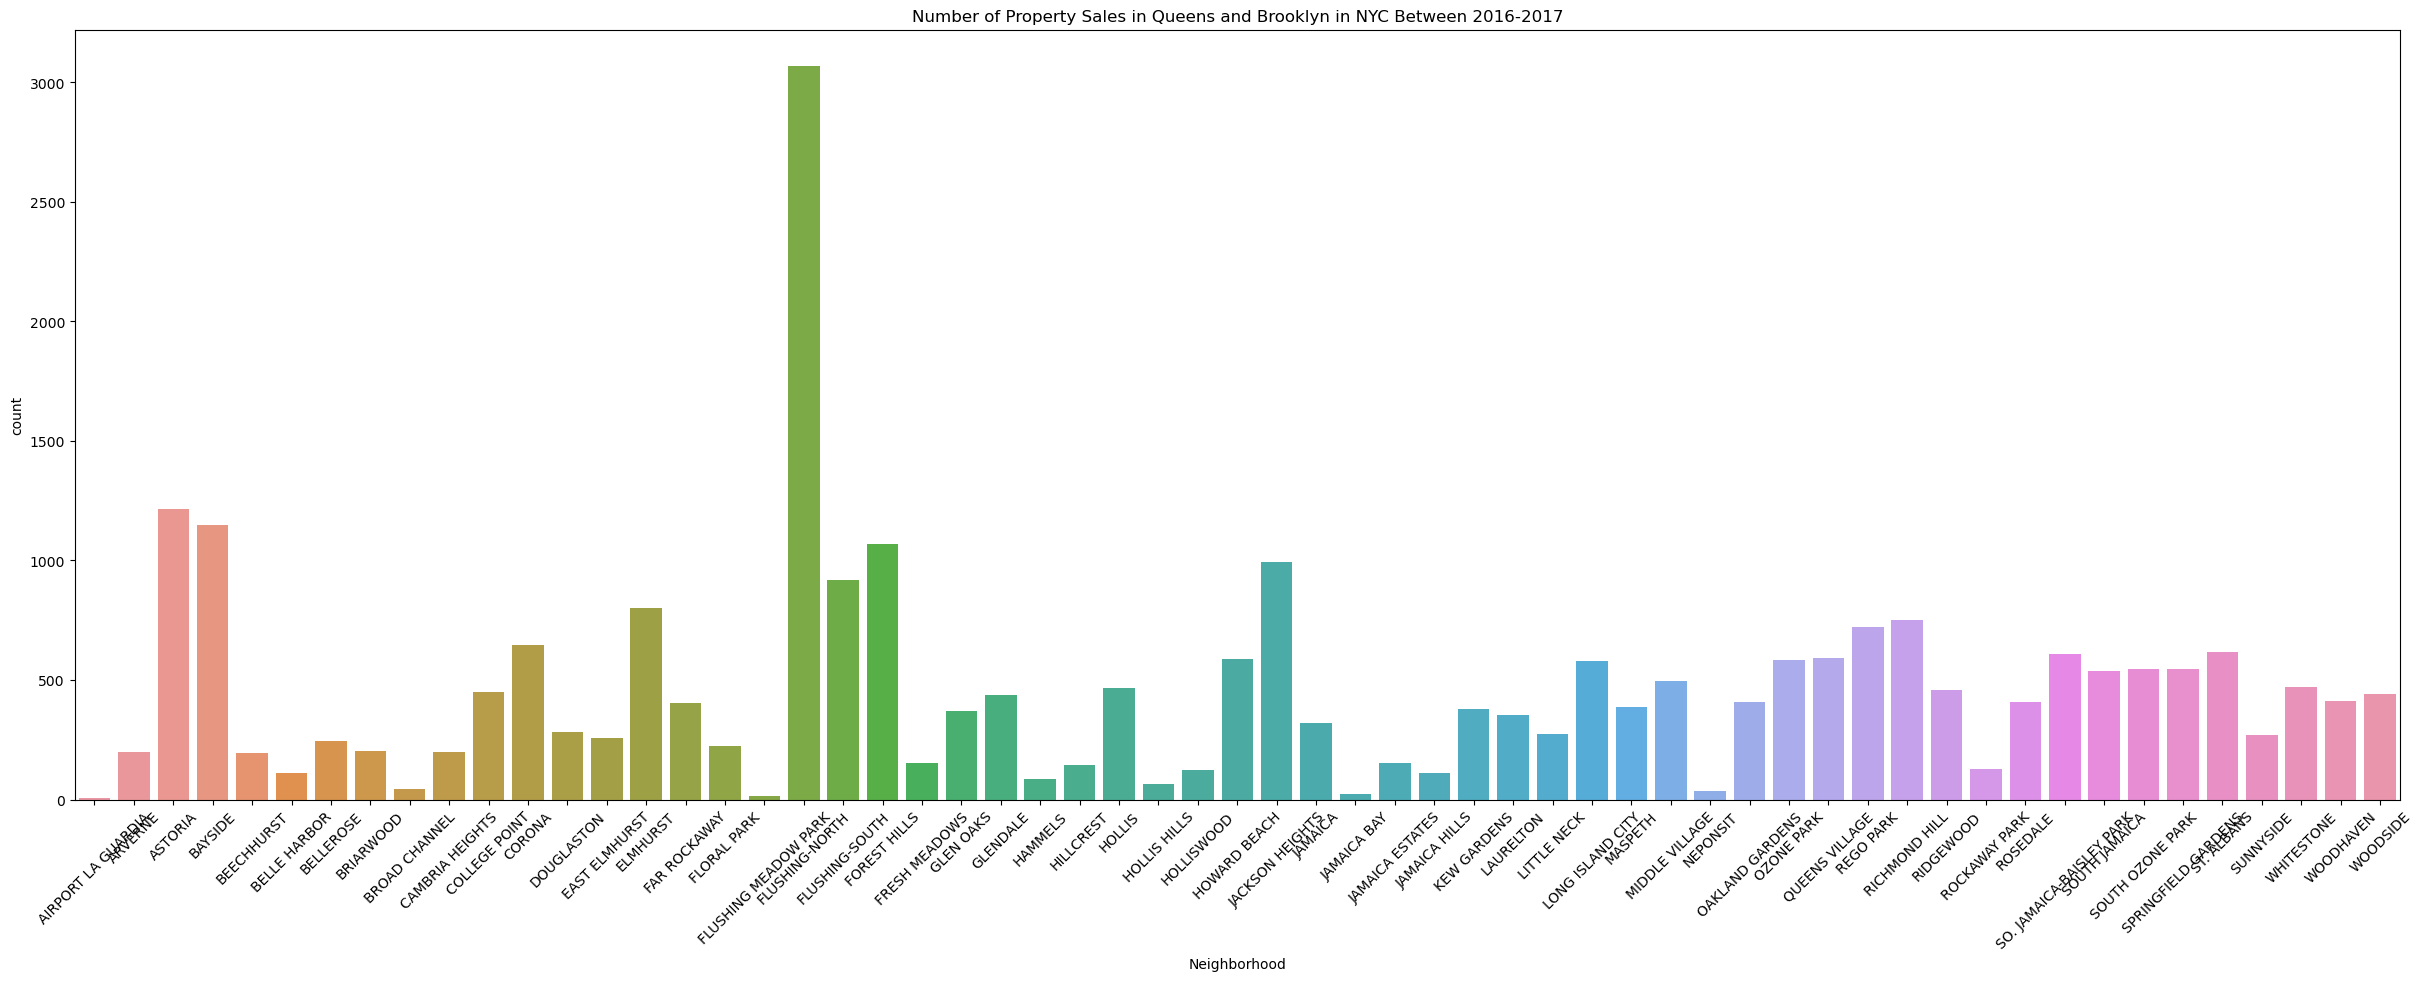

In [10]:
# Plotting the number of property sales in Brooklyn and Queens
plt.figure(figsize=(30,10))
seaborn.countplot(x = "Neighborhood", data = df[df["Borough"].isin(["Brooklyn Borough", "Queens"])])
plt.xlabel("Neighborhood")
plt.xticks(rotation = 45)
plt.title("Number of Property Sales in Queens and Brooklyn in NYC Between 2016-2017")
plt.show()

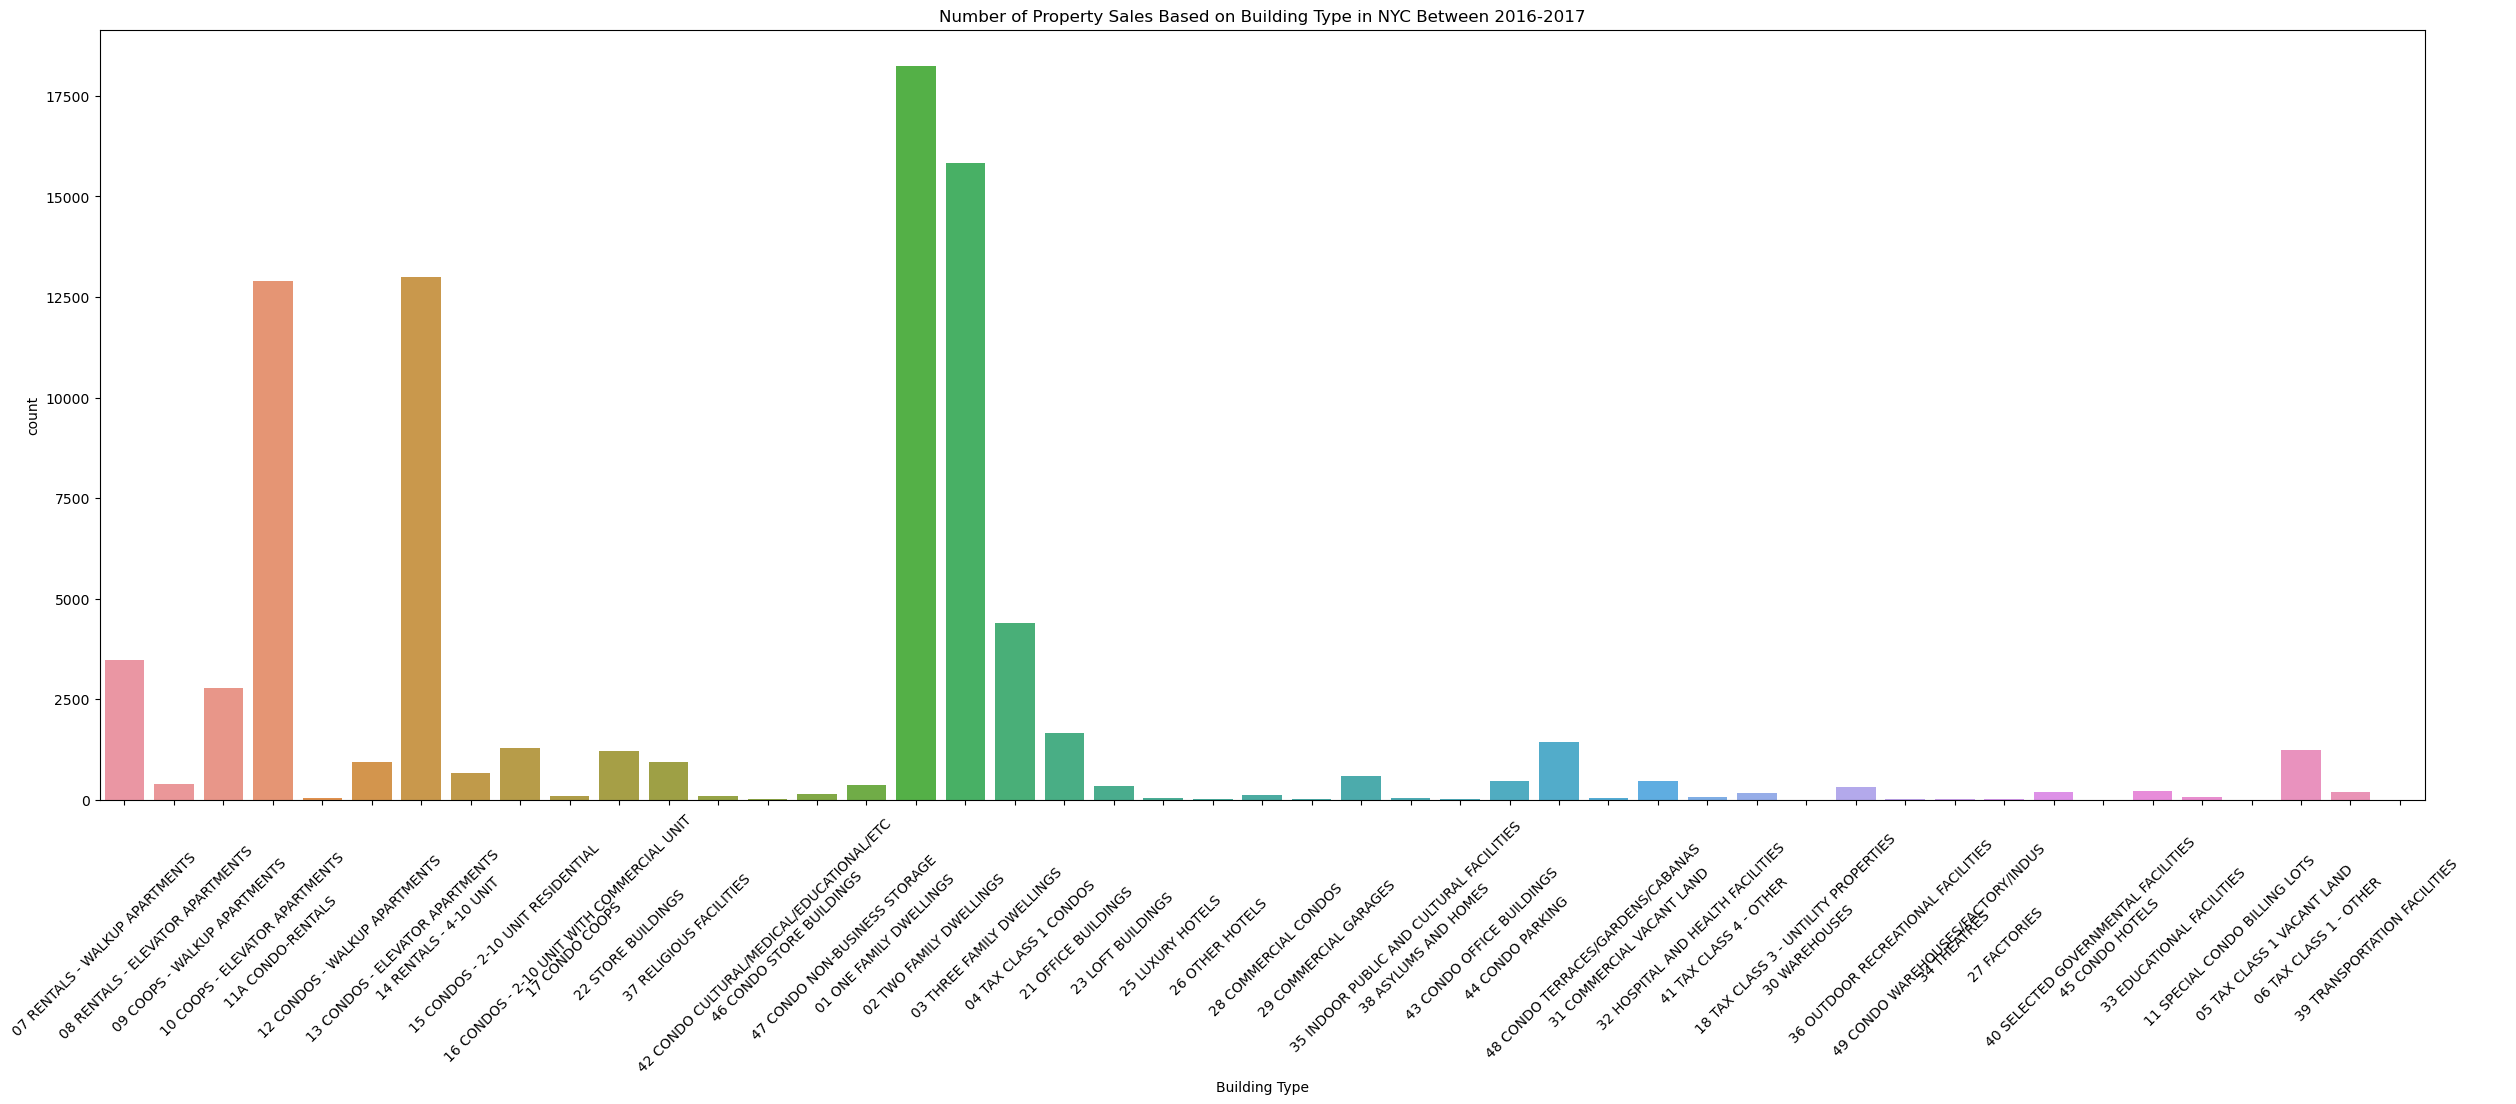

In [11]:
# Plotting the number of property sales for each building type
plt.figure(figsize=(30,10))
seaborn.countplot(x = "Building Code and Type", data = df)
plt.xlabel("Building Type")
plt.xticks(rotation = 45)
plt.title("Number of Property Sales Based on Building Type in NYC Between 2016-2017")
plt.show()

In [12]:
df["Building Code and Type"].describe()

count                                           84548
unique                                             47
top       01 ONE FAMILY DWELLINGS                    
freq                                            18235
Name: Building Code and Type, dtype: object

#### The most popular Building Type that was sold in 2016-2017 was One-Family Dwellings with over 18,000 sold between 2016-2017

This is a surprising find since according to the article "Report: Only 17.05% of NYC Homes are Single-Family" by Mike Lafirenza (Cooperatornews), this rate of 17.0% one-family dwellings/single-family homes are "the smallest share among all large US cities". However, after further thought, this makes sense because most people when looking to buy are only able to afford a single family home as opposed to the few corporations that are able to purchase larger multifamily buildings.

#### The second part of this data exploration is to understand the sales price of NYC properties sold between 2016-2017 and the factors that could impact it such as the age of the building, the number of units in the building, and the time of year the properties were sold.

In [13]:
# Displaying information regarding Sale Price of all NYC property sales from 2016-2017
# Note although there are sale prices that are low (such as $0 or $1), these could potentially be deed transfers, which skews the data; for example the mean sales price could be much higher
df["Sale Price"].describe()

count    6.998700e+04
mean     1.276456e+06
std      1.140526e+07
min      0.000000e+00
25%      2.250000e+05
50%      5.300000e+05
75%      9.500000e+05
max      2.210000e+09
Name: Sale Price, dtype: float64

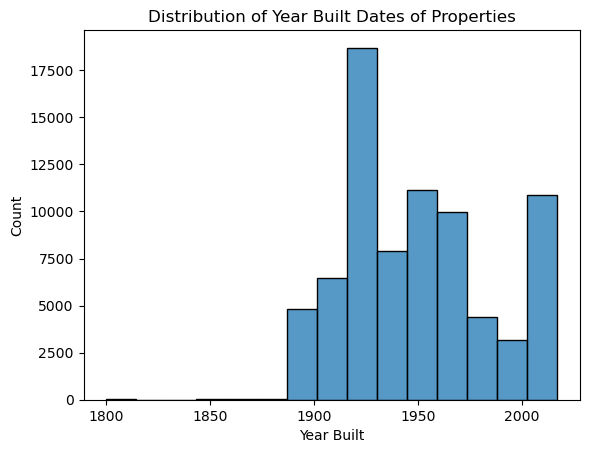

In [14]:
# Plotting the number of sales for properties based on year built
# Converting datatype of "Year Built" from object to integer so the histogram will have bins
df["Year Built"] = pd.to_numeric(df["Year Built"], errors = "coerce")
# Filtering out any property that does not have a Year Built Date or a Year Built Date listed prior to 1800 to condense the graph as there only appeared to be 1 property built prior to 1800's in the 1600's
nonzero_df = df[df["Year Built"] >= 1800]
# Plotting the histogram with a bin size of 15 to show the many dates
seaborn.histplot(data = nonzero_df, x = "Year Built", bins=15)
plt.xlabel("Year Built")
plt.title("Distribution of Year Built Dates of Properties")
plt.show()

In [15]:
# Displaying information regarding Year Built for property sales in NYC between 2016-2017
df["Year Built"].describe()

count    77577.000000
mean      1950.095621
std         34.198032
min       1680.000000
25%       1925.000000
50%       1945.000000
75%       1970.000000
max       2017.000000
Name: Year Built, dtype: float64

#### The average age of properties sold in 2016-2017 were built in 1950; it appears that majority of the properties were built sometime between 1925-1970

It's not surprising to see that most properties in NYC are older as NYC is a pretty old city. According to Renthop, "the median age of a surviving residential building is nearly 90 years old" and that because of the city's massive population growht of nearly 63% from 1900-1920, there was a spike in residential construction during that era which remains till today. In Renthop's article "Building Age and Rents in New York", some of the neighborhoods with the oldest buildings are in Manhattan such as Bowery, Soho, Greenwich Village and East Village.

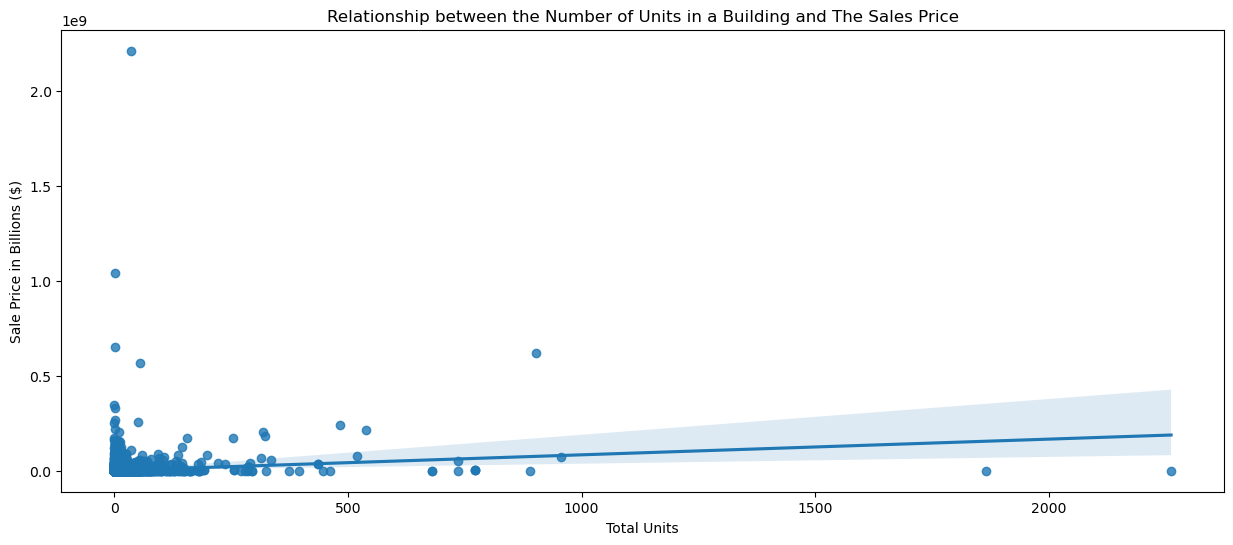

In [16]:
# Plotting the relationship between the total number of units in a building and its sales price
plt.figure(figsize=(15,6))
seaborn.regplot(x="Total Units", y="Sale Price", data = df)
plt.xlabel("Total Units")
plt.ylabel("Sale Price in Billions ($)")
plt.title("Relationship between the Number of Units in a Building and The Sales Price")
plt.show()

In [17]:
# Note that the outliers that appear to have high sales prices with minimal units are office buildings; these data points could potentially skew the data
df.corr()

,Zip Code,Residential Units,Commercial Units,Total Units,Year Built,Sale Price
Zip Code,1.000000,0.005578,0.000726,0.005415,-0.112803,-0.034170
Residential Units,0.005578,1.000000,0.015653,0.888309,-0.017483,0.119698
Commercial Units,0.000726,0.015653,1.000000,0.472998,-0.000596,0.046006
Total Units,0.005415,0.888309,0.472998,1.000000,-0.013975,0.125101
Year Built,-0.112803,-0.017483,-0.000596,-0.013975,1.000000,0.006572
Sale Price,-0.034170,0.119698,0.046006,0.125101,0.006572,1.000000


#### There appears to be a positive correlation between the sales price of a property and the number of total Residential Units, Commercial Units and Total Units

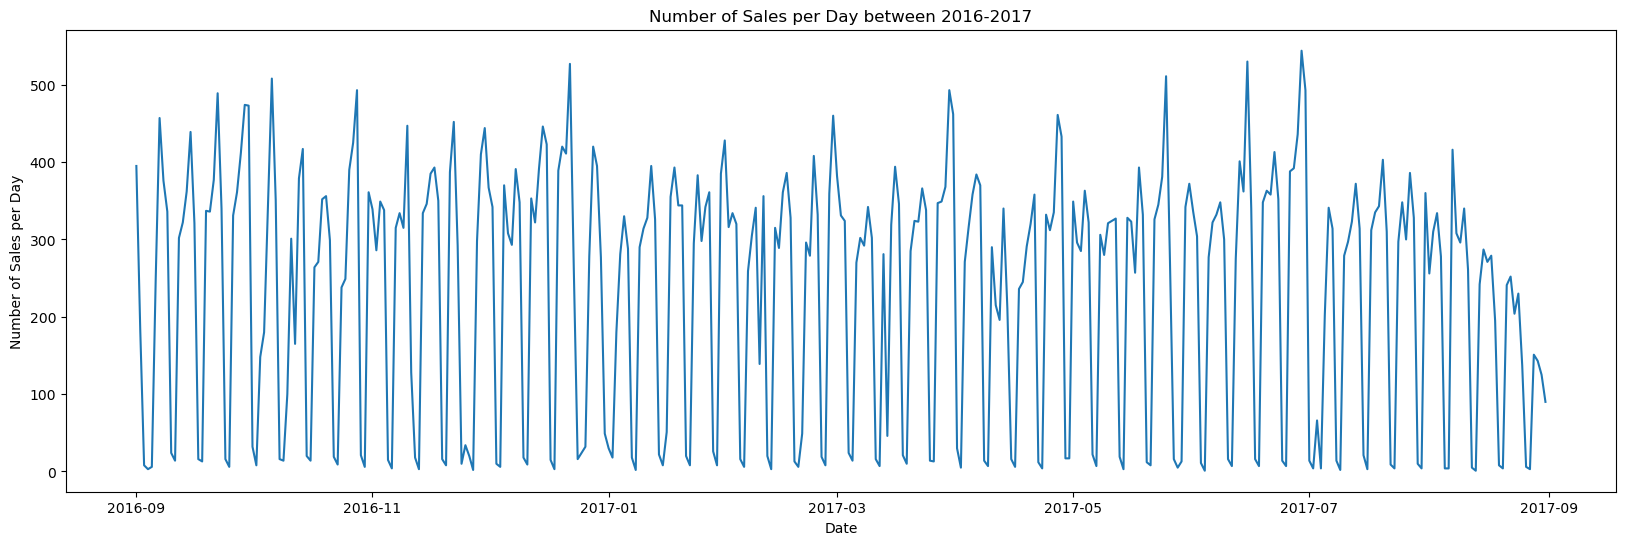

In [18]:
# Plotting the number of sales per day during the 2016-2017 time period
# Creating a new data frame to store a column of the sale date and another column counting the total occurences on each date
daily_sales = df.groupby("Sale Date").size().reset_index(name = "Sales per Day")
# Adjusting the graph size
plt.figure(figsize=(20,6))
plt.plot(daily_sales["Sale Date"], daily_sales["Sales per Day"])
plt.xlabel("Date")
plt.ylabel("Number of Sales per Day")
plt.title("Number of Sales per Day between 2016-2017")
plt.show()

In [19]:
df["Sale Date"].describe()

# The date that had the most sales was on June 29, 2017 with 544 sales that day!

C:\Users\sally\AppData\Local\Temp\ipykernel_16356\3879913848.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df["Sale Date"].describe()


count                   84548
unique                    364
top       2017-06-29 00:00:00
freq                      544
first     2016-09-01 00:00:00
last      2017-08-31 00:00:00
Name: Sale Date, dtype: object

According to the above line graph, there does not appear to be any significant trends in sales pattern. However, this is only a small snippet showing activity within a year as opposed to checking for seasonality across multiple years. For my next project, I would like to extend the timeframe and perhaps look at trends throughout a decade.

In the article "When Is the Best Time To List Your NYC Property?" by Forbes, it appears that most deals occur from March to June. Although, there is a caveat that certain sub-neighborhoods could see different seasonal trends. It would be interesting to look further into this and analyze the trends by neighborhoods as well as the types of property within those neighborhoods.